# Character Recognition Neural Network - Deep Learning Project
### DS 6050
### Amber Curran, Jenny Jang, Abhishek Bada

## Date cleaning + Setup

In [1]:
import xml.etree.ElementTree as ET
from inspect import getmembers, isclass, isfunction
import os 

import shutil
from pathlib import Path

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [10]:
from sklearn.datasets import load_files 
from keras.utils import np_utils
#from tensorflow.python.ops.numpy_ops import np_utils

from keras.preprocessing import image
from tqdm import tqdm # progress bar

data_dir = "/content/drive/MyDrive/train_characters/"
batch_size = 32;
# IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
img_height = 48; 
img_width = 48;

NUM_CLASSES = 36;

# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

# Validation Dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)        



Found 11631 files belonging to 36 classes.
Using 9305 files for training.
Found 11631 files belonging to 36 classes.
Using 2326 files for validation.


In [11]:
# Get list of class names
CLASS_NAMES = train_ds.class_names

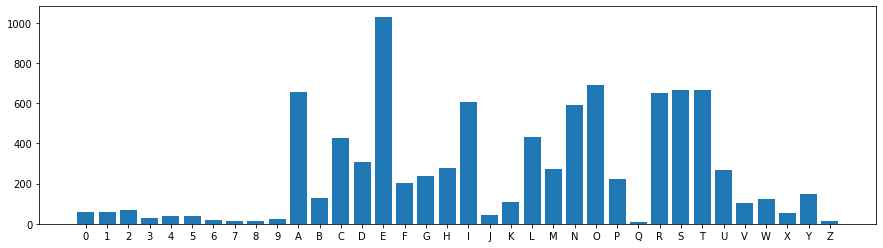

In [22]:
# Get train class distribution
train_labels = np.concatenate([y for images, y in train_ds], axis=0)
_, train_counts = np.unique(train_labels, return_counts=True)

# Plot distribution
plt.figure(figsize=(15,4))
plt.bar(x=CLASS_NAMES, height=train_counts)
plt.show()

In [28]:
# Get Validation Class distribution
#val_labels = np.concatenate([y for images, y in validation_ds], axis=0)
#_, val_counts = np.unique(val_labels, return_counts=True)

# Plot distribution
#plt.figure(figsize=(15,4))
#plt.bar(x=CLASS_NAMES, height=val_counts)
#plt.show()

In [12]:
# One Hot Encode the labels
train_data = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=NUM_CLASSES)))
val_data = validation_ds.map(lambda x, y: (x, tf.one_hot(y, depth=NUM_CLASSES)))


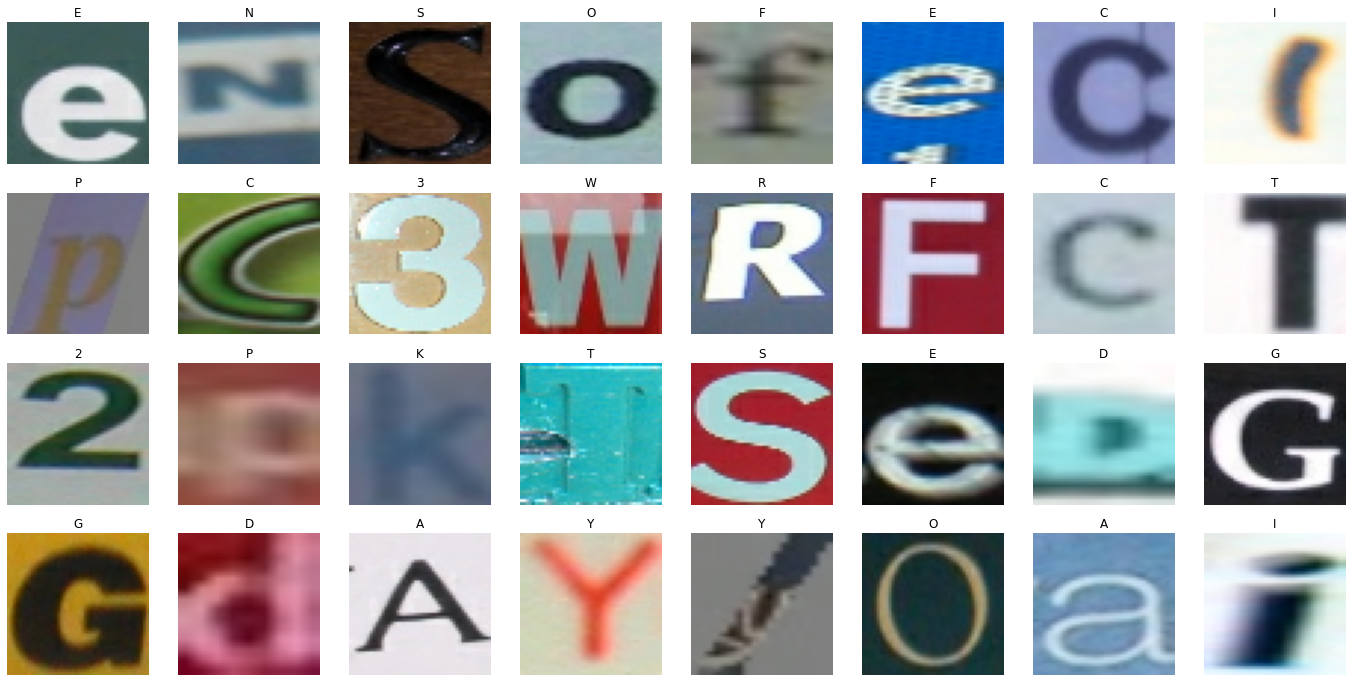

In [20]:
class_names =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
        'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
        'U', 'V', 'W', 'X', 'Y', 'Z']


# Rows and columns are set to fit one training batch (32)
n_rows = 4
n_cols = 8
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)

In [13]:
from keras import metrics
optimizer = keras.optimizers.SGD(lr=0.00001, decay=0.01)

model = keras.Sequential([
    keras.layers.Rescaling(scale=1./127.5, offset=-1),
    
    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (48, 48, 3)),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2),
    
    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2),
    
    keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'),
    keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(36, activation='softmax')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.AUC()])

history = model.fit(train_data, validation_data=val_data, epochs=40)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 54s 180ms/step - loss: 3.2319 - accuracy: 0.1073 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - auc_2: 0.7431 - val_loss: 3.0937 - val_accuracy: 0.1208 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_auc_2: 0.7771
Epoch 2/40
291/291 [==============================] - 52s 177ms/step - loss: 3.0777 - accuracy: 0.1156 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - auc_2: 0.7814 - val_loss: 3.0670 - val_accuracy: 0.0864 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_auc_2: 0.7876
Epoch 3/40
291/291 [==============================] - 53s 181ms/step - loss: 2.9987 - accuracy: 0.1517 - precision_2: 0.3333 - recall_2: 1.0747e-04 - auc_2: 0.7982 - val_loss: 2.9001 - val_accuracy: 0.1943 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_auc_2: 0.8171
Epoch 4/40
291/291 [==============================] - 51s 174ms/step - loss: 2.7768 - accuracy: 0.2272 - precision_2: 0.6458 - recall_2: 0.0100 - auc_2: 0

In [14]:
# Record history of model
result_history = history.history
history_df = pd.DataFrame.from_dict(result_history)
history_df.set_index(history_df.index +1, inplace=True)
#history_df

In [15]:
history_df.iloc[39]

loss               0.094887
accuracy           0.974637
precision_2        0.986802
recall_2           0.964213
auc_2              0.999600
val_loss           1.405978
val_accuracy       0.792347
val_precision_2    0.817692
val_recall_2       0.782889
val_auc_2          0.954022
Name: 40, dtype: float64

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 128)        

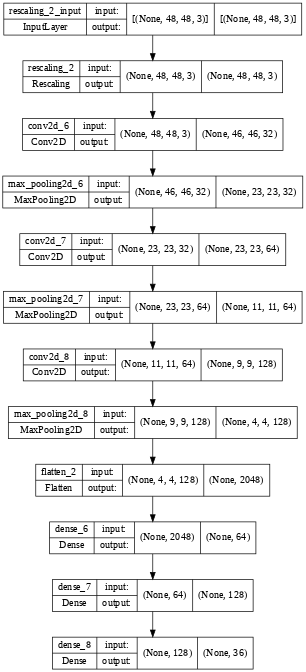

In [26]:
keras.utils.plot_model(model, 'multi_input_and_ouput_model.png', show_shapes=True, dpi=50)

In [16]:
# Load test dataset
data_dir = "/content/drive/MyDrive/Characters_collected_test_set_modified/"

In [17]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)   

Found 331 files belonging to 36 classes.


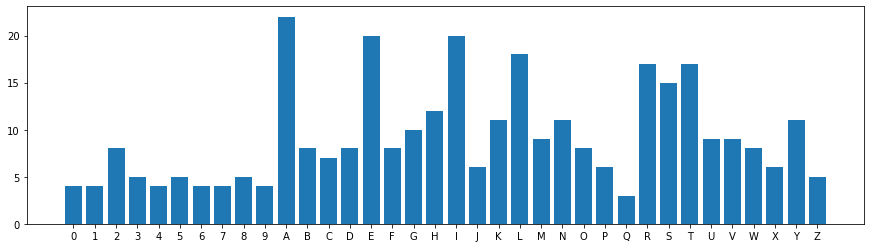

In [27]:
# Get test class distribution
test_labels = np.concatenate([y for images, y in test_ds], axis=0)
_, test_counts = np.unique(test_labels, return_counts=True)

test_class_names = test_ds.class_names

# Plot distribution
plt.figure(figsize=(15,4))
plt.bar(x=test_class_names, height=test_counts)
plt.show()

In [18]:
# One Hot Encode the test labels
test_data = test_ds.map(lambda x, y: (x, tf.one_hot(y, depth=NUM_CLASSES)))

# Evaluate the Model
result = model.evaluate(test_data)

11/11 [==============================] - 114s 2s/step - loss: 3.1711 - accuracy: 0.5680 - precision_2: 0.6357 - recall_2: 0.5378 - auc_2: 0.8796


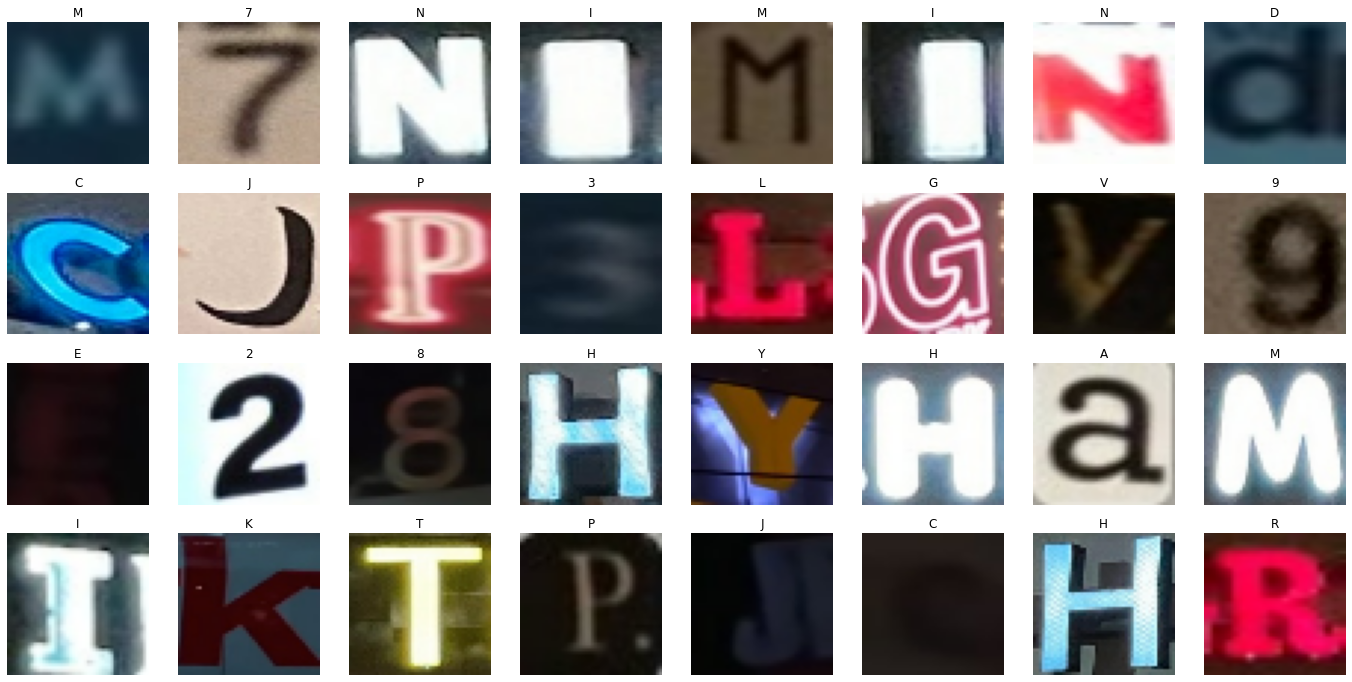

In [21]:
# Rows and columns are set to fit one test batch (32)
n_rows = 4
n_cols = 8
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in test_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)

### GAN

## Setting up image saving and plots as well as GAN model

In [ ]:
def save_images(images, c):
    for index, image in enumerate(images):
        array = image
        array = np.reshape(array, (28, 28))
        print('letter ' + c)
        plt.imsave(str('/Users/abhishekbada/Downloads/characters/Group_' + c + '/char_GAN_' + c + '_' + str(index) + '.jpeg'), array)

def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")
        
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=40000):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
#        print("Epoch {}/{}".format(epoch + 1, n_epochs))              # not shown in the book
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.0]] * batch_size + [[0.9]] * batch_size)  # one sided label smoothing
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        if (epoch % 5000) == 0:
            print("Epoch {}/{}".format(epoch + 1, n_epochs)) 
            plot_multiple_images(generated_images, 8)                     # not shown
            plt.show()                                                    # not shown

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)
#save_fig("gan_generated_images_plot", tight_layout=False)

In [ ]:
gen_optimizer = Adam(0.0001, 0.5)
disc_optimizer = Adam(0.0002, 0.5)

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer = disc_optimizer)
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer = gen_optimizer)

In [ ]:
class_names =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
        'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
        'U', 'V', 'W', 'X', 'Y', 'Z']

In [ ]:
for c in class_names:
    
    from sklearn.datasets import load_files 
    from keras.utils import np_utils
    #from tensorflow.python.ops.numpy_ops import np_utils

    from keras.preprocessing import image
    from tqdm import tqdm # progress bar

    data_dir = str("/Users/abhishekbada/Downloads/characters/)
    batch_size = 32;
    # IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
    img_height = 28; 
    img_width = 28;

    # Training Dataset
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split = 0.2,
        subset = "training",
        seed = 42,
        image_size= (img_height, img_width),
        batch_size = batch_size,
        color_mode='grayscale',
    )

    # Validation Dataset
    validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split = 0.2,
        subset = "validation",
        seed = 42,
        image_size = (img_height, img_width),
        batch_size = batch_size
    )        


    
    
    tf.random.set_seed(42)
    np.random.seed(42)

    codings_size = 100

    generator = keras.models.Sequential([
        keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
        keras.layers.BatchNormalization(momentum=0.8),
        #keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)
        keras.layers.Reshape([7, 7, 128]),
    #    keras.layers.UpSampling2D(size=(2, 2)),
        keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                     activation="relu",
                                    kernel_initializer= tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
        keras.layers.BatchNormalization(momentum=0.8),
        keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                     activation="relu",
                                    kernel_initializer= tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
    ])
    discriminator = keras.models.Sequential([
        keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                            kernel_initializer= tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
                            activation=keras.layers.LeakyReLU(0.2),
                            input_shape=[28, 28, 1]),

        keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                            kernel_initializer= tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
                            activation=keras.layers.LeakyReLU(0.2)),


        keras.layers.Flatten(),
        keras.layers.Dense(256),
        keras.layers.LeakyReLU(alpha=0.2),

        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    gan = keras.models.Sequential([generator, discriminator])


    
    gen_optimizer = Adam(0.0001, 0.5)
    disc_optimizer = Adam(0.0002, 0.5)
    
    
    discriminator.compile(loss="binary_crossentropy", optimizer = disc_optimizer)
    discriminator.trainable = False
    gan.compile(loss="binary_crossentropy", optimizer = gen_optimizer)
    
    batch_size = 32
    #dataset=train_ds.shuffle(1000)
    for image_batch, label_batch in train_ds.take(1):
        dataset = tf.data.Dataset.from_tensor_slices(image_batch).shuffle(1000)
        dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

    
    train_gan(gan, dataset, batch_size, codings_size, c)
